<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 2</h2><br/>
<h1>Modelos de clasificación</h1>
<br/><br/>
    <b>Instructor Principal:</b> Jesús Ortíz jortiz@codingdojo.la <br/>
    <b>Instructor Asistente:</b> Daniela Blanco dblanco@codingdojo.la<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Modelos de clasificación

- Así como los modelos de regresión aprenden a predecir valores, los modelos de clasificación son aquellos enfocados en la **predicción de clases**.
- Algunos modelos de clasificación:
    * Decision Trees
    * Random Forest 
    * KNN
    * Regresión Logística
    * Naive Bayes
    * Redes Neuronales
    * Etc.
- Nota como muchos de los modelos ya aprendidos para regresión también pueden ser utilizados para clasificación (con leves modificaciones)
- A diferencia de los modelos de regresión, en los modelos de clasificación es importante tener en cuenta la cantidad de datos para cada clase. Tener exceso de una clase respecto a otra puede generar graves problemas en el proceso de aprendizaje (aprender mucho mejor de aquella clase que existan más datos).

# Tipos de modelos de clasificación

Los modelos de clasificación pueden ser de tipo
- **Clasificación binaria**: El modelo solo debe predecir entre dos posibles clases
- **Clasificación multiclase**: El modelo debe predecir entre múltiples posibles clases.

# KNN - K Nearest Neighbors (K Vecinos más próximos)

- Modelo basado en instancias y uno de los algoritmos de ML más simples de implementar.
- Permite clasificación y regresión de datos.
- Una nueva instancia se asigna como perteneciente a la clase con las k instancias más cercanas a esta.

<img src="images/KnnClassification.png" alt="" width="300px" align="center"/>
Fuente imagen: https://commons.wikimedia.org/wiki/File:KnnClassification.svg

# KNN con Scikit-Learn

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df2=df.drop(columns=['sepal length (cm)'])

X = df2.drop(columns=['target']) # Separación de las características
y = df2['target'] # Separación del target (corresponde a lo que quiero predecir)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

# Proceso de escalamiento para nuestros datos de características
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # Ojo: escalamiento de test se hace en base al trai
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
predictions = knn.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())
print('Accuracy Train:',knn.score(X_train, y_train))
print('Accuracy Test:',knn.score(X_test, y_test))

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
predictions = knn.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())
print('Accuracy Train:',knn.score(X_train, y_train))
print('Accuracy Test:',knn.score(X_test, y_test))

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]
[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]
Accuracy Train: 0.9428571428571428
Accuracy Test: 1.0


# Regresión Logística (Logistic Regression)

- **Contexto**: Intentemos utilizar la regresión lineal como un clasificador

In [2]:
from sklearn.datasets import load_breast_cancer

# Set de datos sobre datos de cancer de mamas en Wisconsin 
# Objetivo: clasificación de tumores benignos y malignos 
br_cancer = load_breast_cancer()
print('Características', br_cancer.feature_names)
# Originalmente 0 es maligno y 1 es benigno. Lo invertiremos
print('Target', br_cancer.target_names[::-1]) 

Características ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target ['benign' 'malignant']


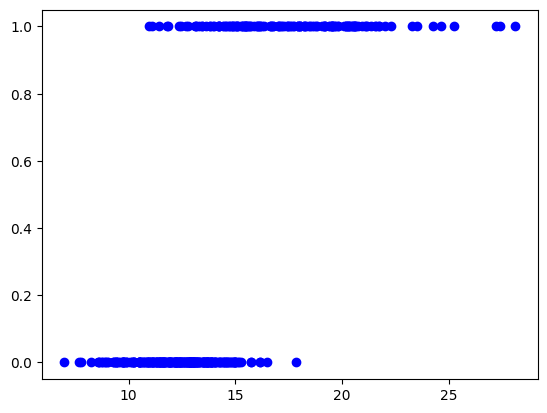

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = br_cancer.data[:, 0].reshape(-1,1) # mean_radius
y = 1 - br_cancer.target # Nuevamente inversión maligno/benigno 0/1
# Luego de inversión: benigno 0 y maligno 1

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=41,
                                                    stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, 
                                                    test_size=0.5, 
                                                    random_state=41)

plt.plot(X_train, y_train,'bo')
plt.show()

In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(398, 1)
(85, 1)
(86, 1)


In [18]:
y_train

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

Intercepto: -1.010729244981332
Coeficientes: [0.09770693]


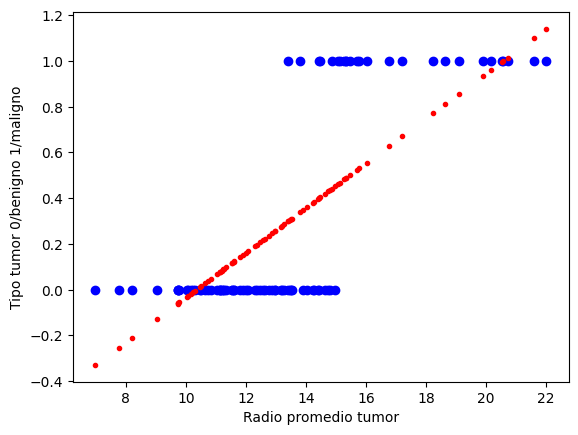

In [5]:
# Ajustando modelo de regresión lineal

from sklearn.linear_model import LinearRegression

# Entrenamiento regresor lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Intercepto:', lin_reg.intercept_, )
print('Coeficientes:', lin_reg.coef_ )

# Gráfico datos reales test vs predicciones de test
plt.plot(X_test, y_test,'bo')
plt.plot(X_test, lin_reg.predict(X_test),'r.')
plt.xlabel('Radio promedio tumor')
plt.ylabel('Tipo tumor 0/benigno 1/maligno')
plt.show()

- Regresión lineal simplemente hace regresión sobre los datos. ¿Cómo podemos clasificar usando este modelo? 
    - R: *umbral*
    
\begin{align}
    \hat{y}=\left\{
    \begin{array}{ll}
      0, & \mbox{si $\hat{p} <0.5$}.\\
      1, & \mbox{si $\hat{p} \geq0.5$}.
    \end{array}
  \right.
\end{align}

donde $\hat{p}$ es el valor predicho por el regresor lineal e $\hat{y}$ es la clase predicha. En este ejemplo, escogeremos el umbral en 0.5 para clasificación
- Problema: ¿Cómo interpretamos los valores de la regresión lineal? por ejemplo  $\hat{p}=-0.25$
- La regresión logística hace la regresión lineal **interpretable**

### Regresión logística

- A pesar de hacer regresión, se utiliza normalmente para clasificación
- Permite darle una interpretación a los valores obtenidos por la regresión: Probabilidad de pertenecer a cierta clase
- Ecuación de función logística

$$ \sigma(t) = \frac{1}{1+e^{-t}} = \frac{1}{1+\frac{1}{e^t}}$$

<img src='images/logisticFunction.png' width=600>

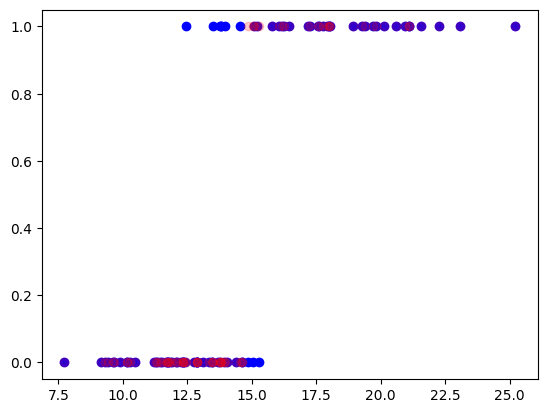

In [6]:
from sklearn.linear_model import LogisticRegression

# Entrenamiento regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Gráfico datos reales test vs predicciones de test
plt.plot(X_val, y_val,'bo')
plt.plot(X_val, log_reg.predict(X_val), 'ro', alpha=0.2)

In [21]:
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_train,log_reg.predict(X_train)))
print("Predicción de regresión logística", log_reg.predict(X_val))
print("Valor target real", y_val)


              precision    recall  f1-score   support

           0       0.88      0.93      0.91       250
           1       0.87      0.79      0.83       148

    accuracy                           0.88       398
   macro avg       0.88      0.86      0.87       398
weighted avg       0.88      0.88      0.88       398

Predicción de regresión logística [0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1
 0 1 1 0 0 1 1 0 1 0 0]
Valor target real [0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1
 0 1 1 0 0 1 1 0 1 1 0]


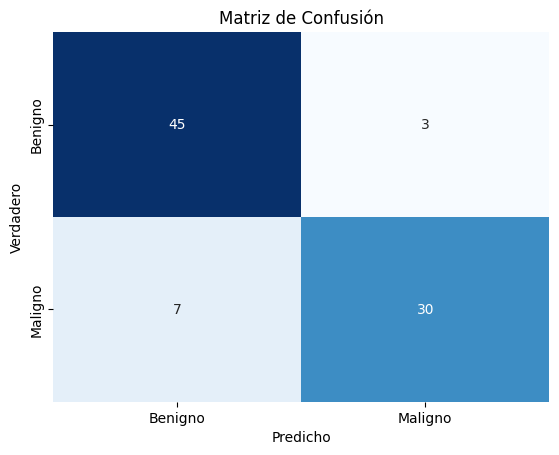

In [13]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Genera la matriz de confusión
cm = confusion_matrix(y_val, log_reg.predict(X_val))

# Crea una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crea un mapa de calor a partir de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

# Añade etiquetas, título y elimina las marcas de verificación
ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['Benigno', 'Maligno'])
ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])

plt.show()


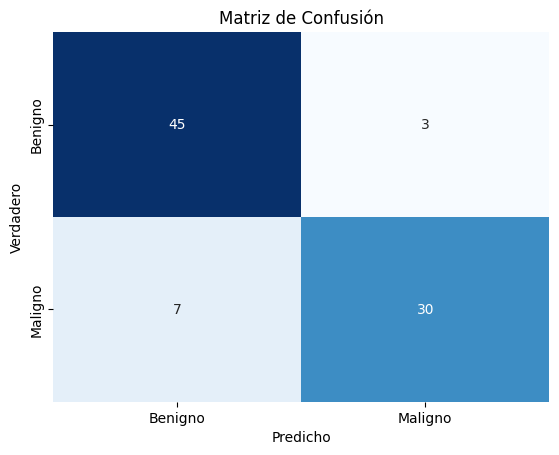

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Genera la matriz de confusión
cm = confusion_matrix(y_val, log_reg.predict(X_val))

# Crea una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crea un mapa de calor a partir de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues", cbar=False)

# Añade etiquetas, título y elimina las marcas de verificación
ax.set_xlabel('Predicho')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
ax.xaxis.set_ticklabels(['Benigno', 'Maligno'])
ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])

plt.show()


In [ ]:
# Visualizar la curva ROC
plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

## Ejercicio 1
Vamos a cargar el dataset "nutrients_csvfile.csv", seleccionamos 2 clases de salida, que sea lo mas balanceado posible. Realizamos un EDA completo. Realizamos el clasificador utilizando Tuberias y KNN. Realizamos analisis de salida. Elegimos un numero de vecino aleatorio.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df=pd.read_csv('/Users/vn55le3/Downloads/DS-June-2023/Datasets/10Agosto/nutrients_csvfile.csv')
df['Category'].unique()

array(['Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',
       'Fish, Seafood', 'Vegetables A-E', 'Vegetables F-P',
       'Vegetables R-Z', 'Fruits A-F', 'Fruits G-P', 'Fruits R-Z',
       'Breads, cereals, fastfood,grains', 'Soups', 'Desserts, sweets',
       'Jams, Jellies', 'Seeds and Nuts', 'Drinks,Alcohol, Beverages'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [21]:
df['Category'].value_counts()

Category
Breads, cereals, fastfood,grains    45
Meat, Poultry                       30
Desserts, sweets                    29
Dairy products                      28
Vegetables A-E                      28
Vegetables R-Z                      28
Fruits G-P                          28
Fruits A-F                          22
Fish, Seafood                       19
Fats, Oils, Shortenings             14
Vegetables F-P                      14
Seeds and Nuts                      12
Drinks,Alcohol, Beverages           12
Soups                               10
Fruits R-Z                           8
Jams, Jellies                        8
Name: count, dtype: int64

In [5]:
def clasificar_categoria(categoria):
    verduras = ['Vegetables A-E', 'Vegetables R-Z', 'Vegetables F-P']
    carnes = ['Meat, Poultry', 'Fish, Seafood']

    if categoria in verduras:
        return 0
    elif categoria in carnes:
        return 1
    else:
        return 2

In [8]:
df['outcome'] = df['Category'].apply(clasificar_categoria)
df=df[df['outcome']!=2]
df['outcome'].value_counts()
del df['Category']

In [9]:
df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,outcome
42,Salt pork,2 oz.,60,470,3,55,NaN,0,0,1
43,Bacon,2 slices,16,95,4,8,7,0,1,1
44,Beef,3 oz.,85,245,23,16,15,0,0,1
45,Hamburger,3 oz.,85,245,21,17,15,0,0,1
46,Ground lean,3 oz.,85,185,24,10,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...
156,"Raw, 2 by 2 1/2",1 med.,150,30,1,t,0,0.6,6,0
157,Tomato juice,1 cup,240,50,2,t,0,0.6,10,0
158,Tomato catsup,1 T.,17,15,t,t,0,t,4,0
159,Turnip greens,1 cup,145,45,4,1,0,1.8,8,0


In [10]:
X = df.drop('outcome', axis=1)
y = df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)


In [11]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [33]:
#debemos entrenar el X_train
preprocessor.fit(X_train)
X_train_processed=preprocessor.transform(X_train)
X_test_processed=preprocessor.transform(X_test)

In [40]:
acc=[]
vec=[]
for n in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_processed, y_train)
    print(f"Acc test :{knn.score(X_test_processed,y_test)}")
    acc.append(knn.score(X_test_processed,y_test))
    vec.append(n)
    y_pred=knn.predict(X_test_processed)


Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :0.9722222222222222
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :0.9722222222222222
Acc test :0.9722222222222222
Acc test :0.9722222222222222
Acc test :1.0
Acc test :0.9722222222222222
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :0.9722222222222222
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0
Acc test :1.0


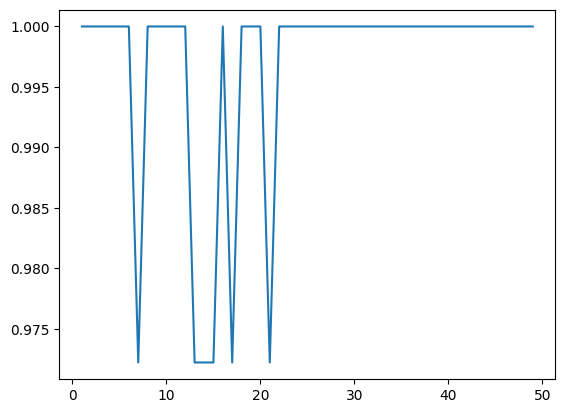

In [41]:
plt.plot(vec,acc)

In [20]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier(n_neighbors=4))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier(n_neighbors=4))])

In [42]:
X_test_processed

<36x327 sparse matrix of type '<class 'numpy.float64'>'
	with 225 stored elements in Compressed Sparse Row format>

In [44]:
X_test

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
49,"Steak, lean, as round",3 oz.,85,220,24,12,11,0,0
157,Tomato juice,1 cup,240,50,2,t,0,0.6,10
57,Roasted chicken,3 1/2 oz.,100,290,25,20,16,0,0
112,Collards,1 cup,150,51,5,t,0,2,8
143,"Potatoes, pan-tried",3/4 cup,100,268,4,14,6,0.40,33
152,"Winter, mashed",1 cup,200,95,4,t,0,2.6,23
142,Potatoes Mashed with milk and butter,1 cup,200,230,4,12,11,0.7,28
92,Asparagus,6 spears,96,18,1,t,t,0.5,3
120,Kohlrabi,1 cup,140,40,2,t,0,1.5,9
62,"Shoulder, braised",3 oz.,85,285,18,23,21,0,0


In [43]:
y_test

49     1
157    0
57     1
112    0
143    0
152    0
142    0
92     0
120    0
62     1
150    0
42     1
89     1
156    0
128    0
139    0
111    0
93     0
59     1
66     1
56     1
105    0
102    0
65     1
55     1
114    0
70     1
134    0
81     1
154    0
90     1
123    0
64     1
67     1
115    0
151    0
Name: outcome, dtype: int64

In [48]:
X_test_processed

<36x327 sparse matrix of type '<class 'numpy.float64'>'
	with 225 stored elements in Compressed Sparse Row format>

In [45]:
predictions=knn.predict(X_test_processed)
predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [47]:
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        15

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [18]:
n_neighbors

5

## Ejercicio 2
Vamos a cargar el dataset "hotel_bookings". Realizamos EDA completo, y hacemos un modelo que pueda predecir la salida. Graficamos una curva de entrenamiento que abarque el numero de vecinos optimo para el correcto rendimiento.

## Ejercicio 3
Cargamos el dataset winequality-red.csv, y hacemos un clasificador de la calidad de los vinos. 

## Ejercicio 4
Cargamos el dataset pokemon, va a filtrar solamente pokemon agua y fuego, y va a hacer la clasificación

# Recordatorio: Tipos de errores

- **Errores de Tipo 1 - Falso Positivo**: Clasificamos un elemento como *perteneciente* (positivo) a la clase **incorrectamente** (falso)

<img src="images/un5.jpeg" alt="" width="300px" align="center"/>

- **Errores de Tipo 2 - Falso Negativo**: Clasificamos un elemento como *no perteneciente* (negativo) a la clase **incorrectamente** (falso)

<img src="images/noUn5.jpeg" alt="" width="300px" align="center"/>

# Recordatorio: Matriz de confusión

- **Matriz de confusión**: Permite contar la cantidad de veces que instancias de la clase A son clasificadas como clase B
<img src="images/matrizConfusion.png" alt="" width="700px" align="center"/>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow", O'Reilly

# Recordatorio: métricas

- **True Positive Rate** (sensibilidad)

$$ TPR = \frac{TP}{TP + FN}$$

- **False Positive Rate** 
$$ FPR = \frac{FP}{FP + TN} $$

# Curvas ROC

- La curva **Característica Operativa del Receptor** (Receiver Operative Characteristic/ROC) muestra la relación entre el True Positive Rate (sensibilidad) y el False Positive Rate. (Visualización [aquí](http://www.navan.name/roc/))
- El **Área Bajo la Curva** (Area Under Curve/AUC) se utiliza como un valor de medida que proyecta lo visualizado en la curva ROC. Un clasificador perfecto tendrá valor $AUC=1$, mientras que para un clasificador aleatorio, $AUC=0.5$. En scikit-learn, para que se pueda calcular el auc_score de un modelo, este **debe** tener el método *predict_proba* (Ej. El modelo Ridge, no posee este método, por lo que no sería posible calcular el auc_score de este).

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve

# Set de datos de flores con solo 2 clases en vez de 3
df = pd.read_csv('data/modifiedIris2Classes.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [7]:
df['target'].value_counts()

0    50
1    50
Name: target, dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression
# Dividir en X e y
X = df.drop(columns = 'target')
y = df['target']
# Crea una instancia del modelo
logreg = LogisticRegression()
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalar la regresión logística
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# Model está aprendiendo la relación entre X e y
logreg.fit(X_train, y_train)

LogisticRegression()

/home/polivares/anaconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


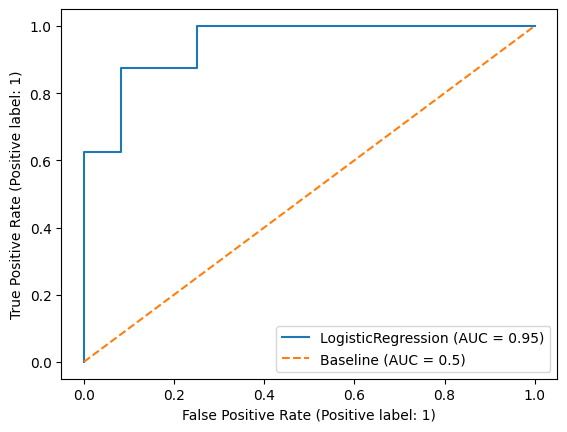

In [9]:
# Visualizar la curva ROC
plot_roc_curve(logreg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [10]:
# Calcular el AUC para conjuntos de entrenamiento y prueba
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

Training AUC: 1.0
Testing AUC: 0.9479166666666667


# Clasificación multiclase

- Hasta ahora hemos estudiado clasificadores binarios: solo son capaces de distinguir entre dos clases.
- Es posible extender algoritmos binarios para poder identificar múltiples clases
- Estrategias:
    - Uno contra Todos (One versus All/One versus the Rest) (OvA/OvR)
    - Uno contra Uno (One versus One) (OvO)

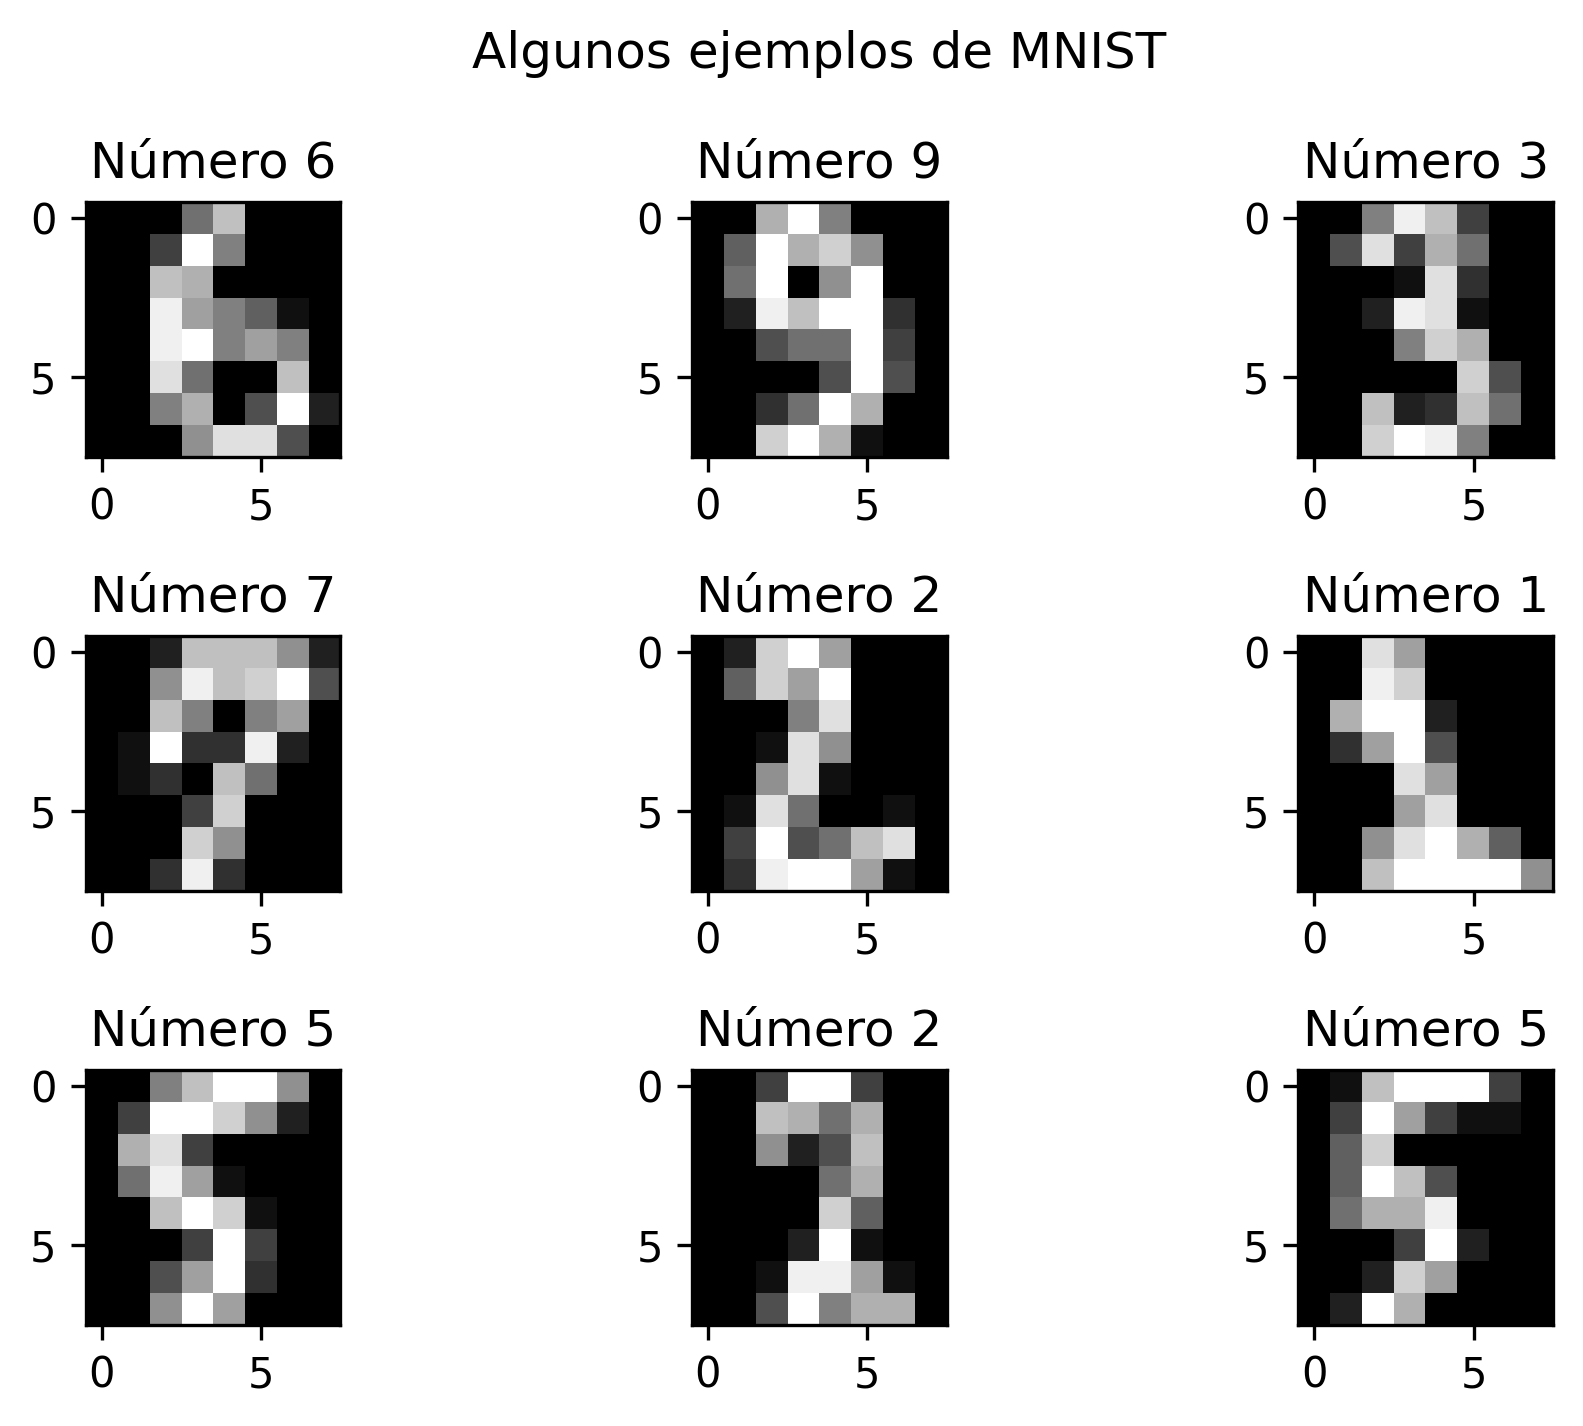

In [11]:
# Usando dataset MNIST para clasificación multiclase
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data # Ojo, en scikit learn, ya vienen los datos en formato fila!!
y = digits.target


# Ejemplos de datos
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

fig = plt.figure(dpi=300)
fig.suptitle('Algunos ejemplos de MNIST')

# Acá se grafican algunos ejemplos de imágenes de dígitos en nuestro dataset
ax = []
rand_numbers = np.random.choice(len(y), 9, replace=False)
for i in range(0,9):
    ax.append(fig.add_subplot(3,3,i+1))
    ax[i].imshow(X[rand_numbers[i]].reshape(8,8), cmap='gray')
    ax[i].title.set_text(f'Número {y[rand_numbers[i]]}')
fig.tight_layout()
plt.show()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
log_reg = LogisticRegression(solver='liblinear',
                            multi_class='ovr')
log_reg.fit(X_train, y_train)

print('Accuracy test: ', log_reg.score(X_test,y_test))
print('Valores reales', y_test)
print('Predicciones:',log_reg.predict(X_test))

Accuracy test:  0.9611111111111111
Valores reales [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
Predicciones: [6 9 3 7 2 1 5 2 5 2 1 8 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 

Valor real 9
Predicción [8]


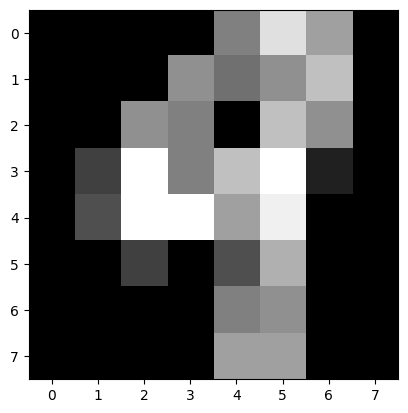

In [14]:
import matplotlib.pyplot as plt
# Ejemplos de predicciones
#i = 20
i = 11 # Error de predicción

image = X_test[i].reshape(8,8)
plt.imshow(image,cmap='gray')
print('Valor real', y_test[i])
print('Predicción', log_reg.predict(X_test[i].reshape(1,-1)))

## Grid Search

GridSearchCV es una técnica de ajuste de hiperparámetros que explora sistemáticamente todas las combinaciones posibles de los parámetros que especificas. Es una forma eficiente de encontrar los valores óptimos para los hiperparámetros de tu modelo.

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
##CREAMOS OTRO PEDACITO DE DATA, PARA PODER VALIDAR EL MODELO, LO DEJAMOS MITI-MITI
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
##CREAMOS OTRO PEDACITO DE DATA, PARA PODER VALIDAR EL MODELO

#X_val = sc.transform(X_val)


param_grid = {'C': [0.001, 0.1], 
              'penalty': ['l1', 'l2'],
              'solver': ['newton-cg', ]}

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))
## aca revisamos resultado, si es necesario perillamos o ajustamos los 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solve

/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_log

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [8]:
print(grid.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [9]:
log_reg=LogisticRegression(C=0.1,penalty='l2',solver='newton-cg',multi_class=)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        60

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



# Bosques aleatorios (Random Forests)

- Scikit-Learn entrega la clase RandomForestClassifier la cual es mucho más conveniente y optimizada a árboles de decisión.

In [13]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=300)
rndf_clf.fit(X_train, y_train)
rndf_clf.score(X_train, y_train)



1.0

In [14]:
rndf_clf.score(X_test, y_test)

0.9707602339181286

- `n_estimators` es el número de árboles en el bosque.
- `max_features` es el número máximo de características consideradas para dividir un nodo.
- `max_depth` es la profundidad máxima del árbol.
- `min_samples_split` es el número mínimo de muestras necesarias para dividir un nodo interno.
- `min_samples_leaf` es el número mínimo de muestras requeridas para estar en un nodo hoja.
- `bootstrap` es si se utilizan muestras de arranque al construir árboles.


In [17]:
print(grid.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [23]:
modelo=RandomForestClassifier(bootstrap=True, max_depth=10,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
modelo.fit(X_train,y_train)
y_pred=modelo.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


## ¿Qué hacer al momento de entrenar un nuevo modelo con datos?

- Paso 0: Cargar los datos
- Paso 1: Entender los datos
    - Histogramas
    - Correlaciones (pandas tiene el método corr para facilitar esto)
    - Correlaciones agrupadas (sumar, restar, etc, columnas de características)
    - Graficar
    - Si hay columnas poco importantes, sacarlas
- Paso 2: Escalamiento/transformación de datos (si es que aplica)
    - Para categorías, en la mayoría de los casos deberías
        * Transformar esa categoría a número
        * Codificar esos números con un OneHotEncoder
    - El escalamiento se utiliza cuando tienes columnas con distintas escalas
- Paso 3: Dividir mi set de datos en entrenamiento y test (ojo, test no se toca sino hasta el final, para las pruebas)
- Paso 4: Decidimos/probamos cuál es el modelo que vamos a utilizar
    - Probar con varios modelos distintos y quedarte con el que tenga una métrica mejor 
    - También puedes probar el mismo modelo entrenado con distintos sub set de datos (gridsearch/randomsearch) para determinar hiper parámetros
- Paso 5: Testear mi modelo utilizando el set de test (set de pruebas)
- Paso 6: Entregar métricas o gráficas de comportamiento de tu modelo

# Actividad 6

A partir del dataset de supervivencia del titanic, disponible [aquí](data/titanic.csv)
- Utilice los algoritmos de clasificación aprendidos para predecir la supervivencia de los pasajeros.
- Obtenga y compare la curva ROC para cada clasificador utilizado.

In [25]:
import pandas as pd

In [26]:
df=pd.read_csv('/Users/vn55le3/Downloads/DS-June-2023/Clases/Classification/data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)

grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

# EJercicio

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [21]:
df=pd.read_csv('/Users/vn55le3/Downloads/DS-June-2023/Clases/Classification/data/titanic.csv')



In [22]:
num_imputer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'),
    ),
    ('scaler',StandardScaler()
    )
])
cat_imputer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent'),
    ),
    ('encoder',OneHotEncoder(handle_unknown='ignore')
    )
])

In [23]:
X=df.drop('Survived',axis=1)
y=df['Survived']
num_cols=X.select_dtypes(include=['int64','float64']).columns
cat_cols=X.select_dtypes(include=['object']).columns

In [24]:
preprocessor=ColumnTransformer(transformers=[
    ('num',num_imputer,num_cols),
    ('cat',cat_imputer,cat_cols)
])

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=7)


In [26]:
preprocessor.fit(X_train)
X_train_processed=preprocessor.transform(X_train)
X_test_processed=preprocessor.transform(X_test)


## Regresion Logistic

In [43]:
param_grid = {'C': [0.001, 0.01, 0.1,1,10], 
              'penalty': ['l1', 'l2'],
              'solver': ['newton-cg','lbfgs','liblinear','sag']}

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train_processed, y_train)

/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vn55le3/Library/Python/

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']})

In [30]:
grid.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [34]:
log_reg=LogisticRegression(C=10,penalty='l1',solver='liblinear')
log_reg.fit(X_train_processed,y_train)
y_pred=log_reg.predict(X_test_processed)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       137
           1       0.80      0.69      0.74        86

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



## KNN

In [36]:
param_grid = {'n_neighbors':[3,5,10,15,20,30,100,500]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=2)
grid.fit(X_train_processed, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 15, 20, 30, 100, 500]},
             verbose=2)

In [37]:
grid.best_params_

{'n_neighbors': 15}

In [38]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_processed,y_train)
y_pred=knn.predict(X_test_processed)
print(classification_report(y_test,y_pred))                   

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       137
           1       0.79      0.67      0.73        86

    accuracy                           0.81       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [10, 20, 30,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2)
grid.fit(X_train_processed, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_le

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 500]},
             verbose=2)

In [40]:
grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [41]:
rf=RandomForestClassifier()
rf.fit(X_train_processed,y_train)
y_pred=rf.predict(X_test_processed)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       137
           1       0.83      0.69      0.75        86

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



una super explicación analizando todas las metricas yllegando a la conclusión que el mejor modelo para la clasificación es RF

In [44]:
rf.feature_importances_

array([0.04524052, 0.04183829, 0.04737087, ..., 0.00717686, 0.0064649 ,
       0.00875041])